##Don't close this browser tab while your project is running.

**Run the code block below to start your Clouderizer project. **

In [0]:
!wget -NS --content-disposition "https://console.clouderizer.com/givemecolabinit"
import colab
colab.init()
!wget -NS --content-disposition "https://console.clouderizer.com/givemeinitsh/g3Y6reDa" && bash ./clouderizer_init.sh

In [0]:
!git clone https://github.com/tensorflow/models.git
#!apt-get -qq install libprotobuf-java protobuf-compiler


Cloning into 'models'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24089 (delta 8), reused 4 (delta 1), pack-reused 24066
Receiving objects: 100% (24089/24089), 563.31 MiB | 34.82 MiB/s, done.
Resolving deltas: 100% (14252/14252), done.
Checking out files: 100% (2767/2767), done.


In [0]:
!cp -a /content/models/research/object_detection /content

In [0]:
!pwd
path = '/content/clouderizer/object_detectionapi/data/object_detection_io/trained_sample/output_inference_graph.pb'

label_path = '/content/clouderizer/object_detectionapi/data/object_detection_io/trained_sample/object-detection.pbtxt'


/content


In [0]:
!protoc  ./object_detection/protos/*.proto --python_out=.

In [0]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt

from PIL import Image

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util



# What model to download.
# MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'

# model with more accurancy but up to you use a diferent model
#MODEL_NAME = 'faster_rcnn_inception_resnet_v2_atrous_coco_2017_11_08'

#MODEL_FILE = MODEL_NAME + '.tar.gz'
#DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
#PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'

PATH_TO_CKPT = '/content/clouderizer/object_detectionapi/data/object_detection_io/trained_sample/output_inference_graph.pb'



#'/content/clouderizer/object_detectionapi/data/object_detection_io/trained_sample/output_inference_graph.pb'


# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = label_path

NUM_CLASSES = 1

'''
opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
  file_name = os.path.basename(file.name)
  if 'frozen_inference_graph.pb' in file_name:
    tar_file.extract(file, os.getcwd())

'''
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')
    
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)




def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)



# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.

'''
PATH_TO_TEST_IMAGES_DIR = 'object_detection/test_images'

TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 3) ]




'''


TEST_IMAGE_PATHS = ['/content/clouderizer/object_detectionapi/data/object_detection_io/testing_images/raccoon-1.jpg',
                    '/content/clouderizer/object_detectionapi/data/object_detection_io/testing_images/raccoon-7.jpg',
                    
                    '/content/object_detection/test_images/image2.jpg',
                    '/content/object_detection/test_images/image1.jpg'
                   ]


# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)




with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    
    
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    
    
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
      
      
      
      
      
      # Actual detection.
      (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      # Visualization of the results of a detection.
      
      
      
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=8)
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)












In [0]:
#training my own detector
'''
You can copy the content of a folder /source to another existing folder /dest with the command

cp -a /source/. /dest/
The -a option is an improved recursive option, that preserve all file attributes, and also preserve symlinks.

The . at end of the source path is a specific cp syntax that allow to copy all files and folders, included hidden ones.
'''

!cp -a /content/clouderizer/object_detectionapi/data/object_detection_io/testing_images/ /content/models/research/object_detection

!cp -a /content/clouderizer/object_detectionapi/data/object_detection_io/data/ /content/models/research/object_detection



!cp -a /content/clouderizer/object_detectionapi/data/object_detection_io/pipeline.config /content/models/research/object_detection

!cp -a /content/clouderizer/object_detectionapi/data/object_detection_io/ssd_mobilenet_v1_0.75_depth /content/models/research/object_detection

!cp -a /content/clouderizer/object_detectionapi/data/object_detection_io/object_detection.pbtxt /content/models/research/object_detection


#python legacy/train.py --logtostderr --train_dir=training/ --pipeline_config_path=training/ssd_mobilenet_v1_pets.config



In [0]:
#!python3 /content/models/research/setup.py build

In [0]:
#!python3 /content/models/research/setup.py install

In [0]:
%cd research
!pwd

/content/models/research
/content/models/research


In [0]:
#compiling protoc do create pb2 file in 

!pwd
#!protoc --python_out=. ./object_detection/protos/anchor_generator.proto ./object_detection/protos/argmax_matcher.proto ./object_detection/protos/bipartite_matcher.proto ./object_detection/protos/box_coder.proto ./object_detection/protos/box_predictor.proto ./object_detection/protos/eval.proto ./object_detection\protos\faster_rcnn.proto .\object_detection\protos\faster_rcnn_box_coder.proto .\object_detection\protos\grid_anchor_generator.proto .\object_detection\protos\hyperparams.proto .\object_detection\protos\image_resizer.proto .\object_detection\protos\input_reader.proto .\object_detection\protos\losses.proto .\object_detection\protos\matcher.proto .\object_detection\protos\mean_stddev_box_coder.proto .\object_detection\protos\model.proto .\object_detection\protos\optimizer.proto .\object_detection\protos\pipeline.proto .\object_detection\protos\post_processing.proto .\object_detection\protos\preprocessor.proto .\object_detection\protos\region_similarity_calculator.proto .\object_detection\protos\square_box_coder.proto .\object_detection\protos\ssd.proto .\object_detection\protos\ssd_anchor_generator.proto .\object_detection\protos\string_int_label_map.proto .\object_detection\protos\train.proto .\object_detection\protos\keypoint_box_coder.proto .\object_detection\protos\multiscale_anchor_generator.proto .\object_detection\protos\graph_rewriter.proto


!protoc  ./object_detection/protos/*.proto --python_out=.
!python3 setup.py build

/content
python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [0]:
!python3 setup.py install

In [0]:
#import os


#os.environ['PYTHONPATH'] += '/content/model/research:./content/model/research/slim:/content/models/research/slim/nets:/content/models/research/slim/nets/nasnet'



In [0]:
!cd /content/models/research
%set_env PYTHONPATH=/content/models/research:/content/models/research/slim


!echo $PYTHONPATH
!pwd


env: PYTHONPATH=/content/models/research:/content/models/research/slim
/content/models/research:/content/models/research/slim
/content/models/research


In [0]:
!python3 object_detection/builders/model_builder_test.py

......................
----------------------------------------------------------------------
Ran 22 tests in 0.136s

OK


In [0]:
#paths to data,labels,everything

'''
/content/clouderizer/object_detectionapi/data/object_detection_io/ssd_mobilenet_v1_0.75_depth
/content/clouderizer/object_detectionapi/data/object_detection_io/data/test.record
/content/clouderizer/object_detectionapi/data/object_detection_io/data/train.record
/content/clouderizer/object_detectionapi/data/object_detection_io/object_detection.pbtxt

/content/models/research/object_detection/ssd_mobilenet_v1_0.75_depth
/content/models/research/object_detection/data/test.record
/content/models/research/object_detection/data/train.record

/content/models/research/object_detection/object_detection.pbtxt
'''




In [0]:
!pwd

!mkdir ./object_detection/training2

/content/models/research


In [0]:
#!echo $PYTHONPATH
!python3 /content/models/research/object_detection/legacy/train.py --logtostderr --train_dir=/content/models/research/object_detection/training2 --pipeline_config_path=/content/models/research/object_detection/pipeline.config 


In [0]:
!tensorboard --logdir content/models/research/object_detection/training


TensorBoard 1.12.2 at http://53c029251b74:6006 (Press CTRL+C to quit)
^C


In [0]:
# path to checkpints /content/models/research/object_detection/training
'''
file used for exporting /content/models/research/object_detection/export_inference_graph.py

python3 export_inference_graph.py  --input_type_tensor --pipeline_config_path /path/ \
        --trained_checkpoint_prefix path/model.ckpt --output_dictionary_path /path  


congif_path:/content/models/research/object_detection/pipeline.config
rained_checkpoint:/content/models/research/object_detection/training
output_directory:/content/models/research/object_detection/training



first frozen model saved:
training
second frozen model saved:
training2



'''



!python3 ./object_detection/export_inference_graph.py \
        --input_type_tensor \
        --pipeline_config_path /content/models/research/object_detection/pipeline.config \
        --trained_checkpoint_prefix /content/models/research/object_detection/training/model.ckpt-100 \
        --output_directory /content/models/research/object_detection/training2  





In [0]:
TEST_IMAGE_PATHS = [ 'myimage_{}.jpg'.format(i) for i in range(1,9) if not (i==6 or i ==7)]
TEST_IMAGE_PATHS.append('myimage_6.jpeg')
TEST_IMAGE_PATHS.append('myimage_7.jpeg')
TEST_IMAGE_PATHS


['myimage_1.jpg',
 'myimage_2.jpg',
 'myimage_3.jpg',
 'myimage_4.jpg',
 'myimage_5.jpg',
 'myimage_8.jpg',
 'myimage_6.jpeg',
 'myimage_7.jpeg']

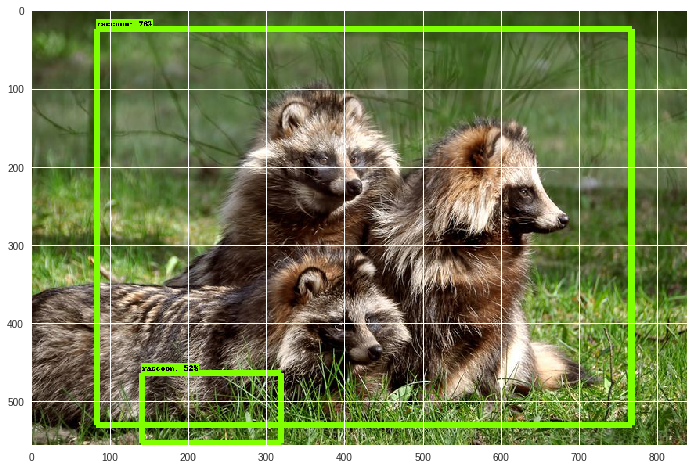

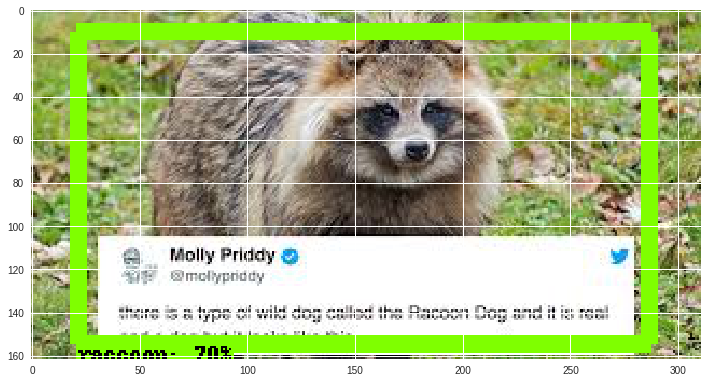

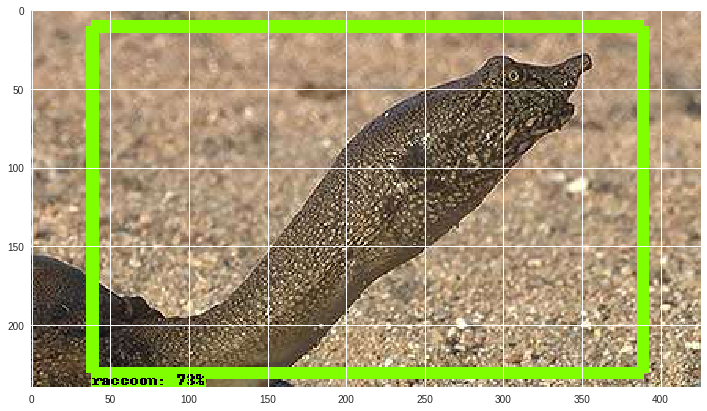

In [0]:
#/content/models/research/object_detection/training/frozen_inference_graph.pb
'''
using the graph from the trained modlel 
'''
'''
getting the test images
/content/models/research/object_detection/testing_images/raccoon-1.jpg

/content/models/research/object_detection/testing_images/raccoon-2.jpg

/content/models/research/object_detection/testing_images/raccoon-4.jpg


'''





import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt

from PIL import Image

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util



# What model to download.
# MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'

# model with more accurancy but up to you use a diferent model
#MODEL_NAME = 'faster_rcnn_inception_resnet_v2_atrous_coco_2017_11_08'

#MODEL_FILE = MODEL_NAME + '.tar.gz'
#DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
#PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'



path2 = '/content/clouderizer/object_detectionapi/data/object_detection_io/ssd_mobilenet_v1_0.75_depth/frozen_inference_graph.pb'

path3 = '/content/models/research/object_detection/training2/frozen_inference_graph.pb'


PATH_TO_CKPT = '/content/clouderizer/object_detectionapi/out/training2/frozen_inference_graph.pb'


# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/content/clouderizer/object_detectionapi/data/object_detection_io/object_detection.pbtxt'

NUM_CLASSES = 1

'''
opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
  file_name = os.path.basename(file.name)
  if 'frozen_inference_graph.pb' in file_name:
    tar_file.extract(file, os.getcwd())

'''
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')
    
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)




def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)



# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.

'''

PATH_TO_TEST_IMAGES_DIR = 'object_detection/test_images'



TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 3) ]

paths = ''

imgs= ['birds.jpeg','bookpage.jpg','cat.jpg','cat2.jpeg','house.jpg',
       'rose.jpeg','snow_pole.jpg','space.jpg','truck.jpg','watch.jpg']




TEST_IMAGE_PATHS = ['/content/clouderizer/object_detectionapi/data/object_detection_io/testing_images/raccoon-1.jpg',
                    '/content/clouderizer/object_detectionapi/data/object_detection_io/testing_images/raccoon-7.jpg'
                   ]
'''


'''
TEST_IMAGE_PATHS = [ '/content/myimage_{}.jpg'.format(i) for i in range(1,9) if not (i==6 or i == 7)]
TEST_IMAGE_PATHS.append('/content/myimage_6.jpeg')
TEST_IMAGE_PATHS.append('/content/myimage_7.jpeg')
'''



TEST_IMAGE_PATHS = ['/content/image_1.jpg','/content/images.jpg','/content/face_image.jpg']





# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)




with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    
    
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    
    
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
      
      
      
      
      
      # Actual detection.
      (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      # Visualization of the results of a detection.
      
      
      
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=8)
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)





In [0]:
cp -a  /content/models/research/object_detection/training2 /content/clouderizer/object_detectionapi/out

In [0]:
#trying to copy the models folder into 


!cp -a  /content/models /content/clouderizer/object_detectionapi/out

#FACE DETECTION

In [0]:
!pwd
%cd content

/
/content


In [0]:
'''
paths tfrecord:

test path: /content/models/research/object_detection/data/face_rec_data/test.record
train_path:/content/models/research/object_detection/data/face_rec_data/train.record

'''

In [0]:

!cp -a /content/clouderizer/object_detectionapi/data/object_detection_io/face_rec_data/ /content/models/research/object_detection/data

!cp -a /content/clouderizer/object_detectionapi/data/object_detection_io/face_pipeline.config /content/models/research/object_detection

!cp -a /content/clouderizer/object_detectionapi/data/object_detection_io/ssd_mobilenet_v1_0.75_depth /content/models/research/object_detection

!cp -a /content/clouderizer/object_detectionapi/data/object_detection_io/object_detection.pbtxt /content/models/research/object_detection

!cp -a /content/clouderizer/object_detectionapi/data/object_detection_io/face_pipeline.config /content/models/research/object_detection


In [0]:
import time
!cd /content/models/research
%set_env PYTHONPATH=/content/models/research:/content/models/research/slim


!echo $PYTHONPATH
!pwd





env: PYTHONPATH=/content/models/research:/content/models/research/slim
/content/models/research:/content/models/research/slim
/content


In [0]:
!mkdir /content/models/research/object_detection/face_trained2

mkdir: cannot create directory ‘/content/models/research/object_detection/face_trained2’: File exists


In [0]:
%cd models/research
!pwd

[Errno 2] No such file or directory: 'models/research'
/content/models/research
/content/models/research


In [0]:
!python3 setup.py build


In [0]:
!python3 setup.py install


In [0]:
!protoc  ./object_detection/protos/*.proto --python_out=.

In [0]:
#paths
'''
train.record  /content/clouderizer/object_detectionapi/data/object_detection_io/data/tfrecord/training.record

test.record  /content/clouderizer/object_detectionapi/data/object_detection_io/data/tfrecord/testing.record



'''


#!cp -a /content/face_pipeline.config /content/models/research/object_detection

In [0]:

#!echo $PYTHONPATH
!python3 /content/models/research/object_detection/legacy/train.py \
--logtostderr \
--train_dir=/content/models/research/object_detection/face_trained2 \
--pipeline_config_path=/content/models/research/object_detection/face_pipeline.config





Instructions for updating:
Use object_detection/model_main.py.
Instructions for updating:
Please switch to tf.train.create_global_step
Instructions for updating:
Use `tf.data.experimental.parallel_interleave(...)`.
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Instructions for updating:
Use the `axis` argument instead
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.batch(batch_size)` (or `padded_batch(...)` if `dynamic_pad=True`).
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of 

In [0]:

!python3 ./object_detection/export_inference_graph.py \
        --input_type_tensor \
        --pipeline_config_path=/content/face_pipeline.config \
        --trained_checkpoint_prefix /content/models/research/object_detection/face_trained2/model.ckpt-100 \
        --output_directory=/content/clouderizer/object_detectionapi/out/face_model 



Instructions for updating:
Please switch to tf.train.get_or_create_global_step
Instructions for updating:
Use `tf.profiler.profile(graph, run_meta, op_log, cmd, options)`. Build `options` with `tf.profiler.ProfileOptionBuilder`. See README.md for details
114 ops no flops stats due to incomplete shapes.
Parsing Inputs...
Incomplete shape.

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              0
-min_occurrence             0
-step                       -1
-order_by                   name
-account_type_regexes       _trainable_variables
-start_name_regexes         .*
-trim_name_regexes          .*BatchNorm.*
-show_name_regexes          .*
-hide_name_regexes          
-account_displaye

In [0]:
#/content/models/research/object_detection/training/frozen_inference_graph.pb
'''
using the graph from the trained modlel 
'''
'''
getting the test images
/content/models/research/object_detection/testing_images/raccoon-1.jpg

/content/models/research/object_detection/testing_images/raccoon-2.jpg

/content/models/research/object_detection/testing_images/raccoon-4.jpg


'''





import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt

from PIL import Image

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util



# What model to download.
# MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'

# model with more accurancy but up to you use a diferent model
#MODEL_NAME = 'faster_rcnn_inception_resnet_v2_atrous_coco_2017_11_08'

#MODEL_FILE = MODEL_NAME + '.tar.gz'
#DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
#PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'



path2 = '/content/clouderizer/object_detectionapi/data/object_detection_io/ssd_mobilenet_v1_0.75_depth/frozen_inference_graph.pb'

path3 = '/content/models/research/object_detection/training2/frozen_inference_graph.pb'

path4 =  '/content/models/research/object_detection/face_trained/frozen_inference_graph.pb'


path5 = '/content/clouderizer/object_detectionapi/out/face_model/frozen_inference_graph.pb'


PATH_TO_CKPT = path2


# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/content/clouderizer/object_detectionapi/data/object_detection_io/object_detection.pbtxt'

NUM_CLASSES = 1

'''
opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
  file_name = os.path.basename(file.name)
  if 'frozen_inference_graph.pb' in file_name:
    tar_file.extract(file, os.getcwd())

'''
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')
    
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)




def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)



# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.

'''

PATH_TO_TEST_IMAGES_DIR = 'object_detection/test_images'



TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 3) ]

paths = ''

imgs= ['birds.jpeg','bookpage.jpg','cat.jpg','cat2.jpeg','house.jpg',
       'rose.jpeg','snow_pole.jpg','space.jpg','truck.jpg','watch.jpg']




TEST_IMAGE_PATHS = ['/content/clouderizer/object_detectionapi/data/object_detection_io/testing_images/raccoon-1.jpg',
                    '/content/clouderizer/object_detectionapi/data/object_detection_io/testing_images/raccoon-7.jpg'
                   ]
'''

'''
TEST_IMAGE_PATHS = [ '/content/myimage_{}.jpg'.format(i) for i in range(1,9) if not (i==6 or i == 7)]
TEST_IMAGE_PATHS.append('/content/myimage_6.jpeg')
TEST_IMAGE_PATHS.append('/content/myimage_7.jpeg')

TEST_IMAGE_PATHS = ['/content/clouderizer/object_detectionapi/data/object_detection_io/data/training/image001.jpg']
'''



face_test_image_paths = ['/content/clouderizer/object_detectionapi/data/object_detection_io/data/training/image003.jpg',
                         '/content/image011.png','/content/image097.jpg','/content/image116.jpg','/content/image131.jpg'
                         ,'/content/image231.jpg','/content/image243.jpg',
                        '/content/clouderizer/object_detectionapi/data/object_detection_io/testing_images/raccoon-2.jpg']

fake_images = ['/content/clouderizer/object_detectionapi/data/object_detection_io/testing_images/raccoon-2.jpg',
                    '/content/clouderizer/object_detectionapi/data/object_detection_io/testing_images/raccoon-4.jpg',
                    '/content/clouderizer/object_detectionapi/data/object_detection_io/testing_images/raccoon-7.jpg',
              ]


# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)




with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    
    
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    
    
    for image_path in fake_images:
      image = Image.open(image_path)
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
      
      
      
      
      
      # Actual detection.
      (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      # Visualization of the results of a detection.
      
      #print(boxes)
      
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=8)
      
      plt.imshow(image_np)
      
      




In [0]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import time
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
import cv2
from PIL import Image

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util



# What model to download.
#MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'

# model with more accurancy but up to you use a diferent model
MODEL_NAME = 'faster_rcnn_inception_resnet_v2_atrous_coco_2017_11_08'

MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'



# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/content/object_detection/data/mscoco_label_map.pbtxt'

NUM_CLASSES = 1


opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
  file_name = os.path.basename(file.name)
  if 'frozen_inference_graph.pb' in file_name:
    tar_file.extract(file, os.getcwd())


detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')
    
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)




def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)



# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.


PATH_TO_TEST_IMAGES_DIR = 'object_detection/test_images'



#TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 3) ]
'''
paths = ''

imgs= ['birds.jpeg','bookpage.jpg','cat.jpg','cat2.jpeg','house.jpg',
       'rose.jpeg','snow_pole.jpg','space.jpg','truck.jpg','watch.jpg']




TEST_IMAGE_PATHS = ['/content/clouderizer/object_detectionapi/data/object_detection_io/testing_images/raccoon-1.jpg',
                    '/content/clouderizer/object_detectionapi/data/object_detection_io/testing_images/raccoon-7.jpg'
                   ]
'''


s = time.time()






# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

TEST_IMAGE_PATHS = [
                    '/content/clouderizer/object_detectionapi/data/object_detection_io/data/testing/image005.jpg'
                    ]


with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    
    
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    
    
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
      
      
      
      
      
      # Actual detection.
      (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      # Visualization of the results of a detection.
      
      
      
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=8)
      plt.figure(figsize=IMAGE_SIZE)
      
      #print(image_np)
      #plt.imshow(image_np)
      cv2.imshow('image',image_np)  



print("time taken{}".format(time.time()-s))






In [0]:
for i in range(1,10):
  print(i)  

a = [i for in range(1,10)]  
  
  